__This problem involves use of the bone marrow transplant study data (§ 1.3 in Klein & Moeschberger)),
where the entire sample of 137 patients (99 AML, 38 ALL) is to be used. The outcome of interest is
disease-free survival, so you must choose your censoring variable carefully__

In [ ]:
source("Stat255Functions.R")

__(a) For the sample of 137 patients, estimate the survival function using the Kaplan-Meier method.
Again, the outcome of interest is disease-free survival.__

In [3]:
bmt = read.csv("bmt.csv")

In [4]:
head(bmt)

X,g,tdeath,tnodis,idead,irelpse,inodis,taghd,iaghd,tcghd,⋯,agep,aged,imalep,imaled,icmvp,icmvd,waittime,fab,hosp,imtx
1,1,2081,2081,0,0,0,67,1,121,⋯,26,33,1,0,1,1,98,0,1,0
2,1,1602,1602,0,0,0,1602,0,139,⋯,21,37,1,1,0,0,1720,0,1,0
3,1,1496,1496,0,0,0,1496,0,307,⋯,26,35,1,1,1,0,127,0,1,0
4,1,1462,1462,0,0,0,70,1,95,⋯,17,21,0,1,0,0,168,0,1,0
5,1,1433,1433,0,0,0,1433,0,236,⋯,32,36,1,1,1,1,93,0,1,0
6,1,1377,1377,0,0,0,1377,0,123,⋯,22,31,1,1,1,1,2187,0,1,0


In [7]:
str(bmt)

'data.frame':	137 obs. of  23 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ g       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ tdeath  : int  2081 1602 1496 1462 1433 1377 1330 996 226 1199 ...
 $ tnodis  : int  2081 1602 1496 1462 1433 1377 1330 996 226 1199 ...
 $ idead   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ irelpse : int  0 0 0 0 0 0 0 0 0 0 ...
 $ inodis  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ taghd   : int  67 1602 1496 70 1433 1377 1330 72 226 1199 ...
 $ iaghd   : int  1 0 0 1 0 0 0 1 0 0 ...
 $ tcghd   : int  121 139 307 95 236 123 96 121 226 91 ...
 $ icghd   : int  1 1 1 1 1 1 1 1 0 1 ...
 $ tplate  : int  13 18 12 13 12 12 17 12 10 29 ...
 $ iplate  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ agep    : int  26 21 26 17 32 22 20 22 18 24 ...
 $ aged    : int  33 37 35 21 36 31 17 24 21 40 ...
 $ imalep  : int  1 1 1 0 1 1 1 1 0 1 ...
 $ imaled  : int  0 1 1 1 1 1 0 0 1 1 ...
 $ icmvp   : int  1 0 1 0 1 1 1 0 0 0 ...
 $ icmvd   : int  1 0 0 0 1 1 1 0 0 1 ...
 $ waittime: int  98 1720 127 168 

In [8]:
dim(bmt)

[1] 137  23

In [13]:
library( survival )

kmEst = survfit(Surv(tnodis, inodis) ~ 1, data = bmt, conf.type = "log-log")
kmEst

Call: survfit(formula = Surv(tnodis, inodis) ~ 1, data = bmt, conf.type = "log-log")

      n  events  median 0.95LCL 0.95UCL 
    137      83     481     363     748 

In [17]:
summary(kmEst)

Call: survfit(formula = Surv(tnodis, inodis) ~ 1, data = bmt, conf.type = "log-log")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1    137       1    0.993 0.00727        0.949        0.999
    2    136       1    0.985 0.01025        0.943        0.996
   10    135       1    0.978 0.01250        0.934        0.993
   16    134       1    0.971 0.01438        0.924        0.989
   32    133       1    0.964 0.01602        0.915        0.985
   35    132       1    0.956 0.01748        0.905        0.980
   47    131       2    0.942 0.02003        0.887        0.970
   48    129       2    0.927 0.02222        0.869        0.960
   53    127       1    0.920 0.02322        0.860        0.955
   55    126       1    0.912 0.02415        0.851        0.949
   63    125       1    0.905 0.02504        0.842        0.944
   64    124       1    0.898 0.02588        0.834        0.938
   74    123       2    0.883 0.02744        0.816        0.927
   76    121      

__(b) Obtain estimates and 95% confidence intervals for the proportion surviving disease-free at 180
and at 365 days.__

In [18]:
pKM(kmEst, c(180, 365))

time,km.est,lower,upper
180,0.7007299,0.6164551,0.7699455
365,0.5830495,0.4957367,0.6604981


__(c) Plot the estimated survival function and pointwise confidence intervals.__

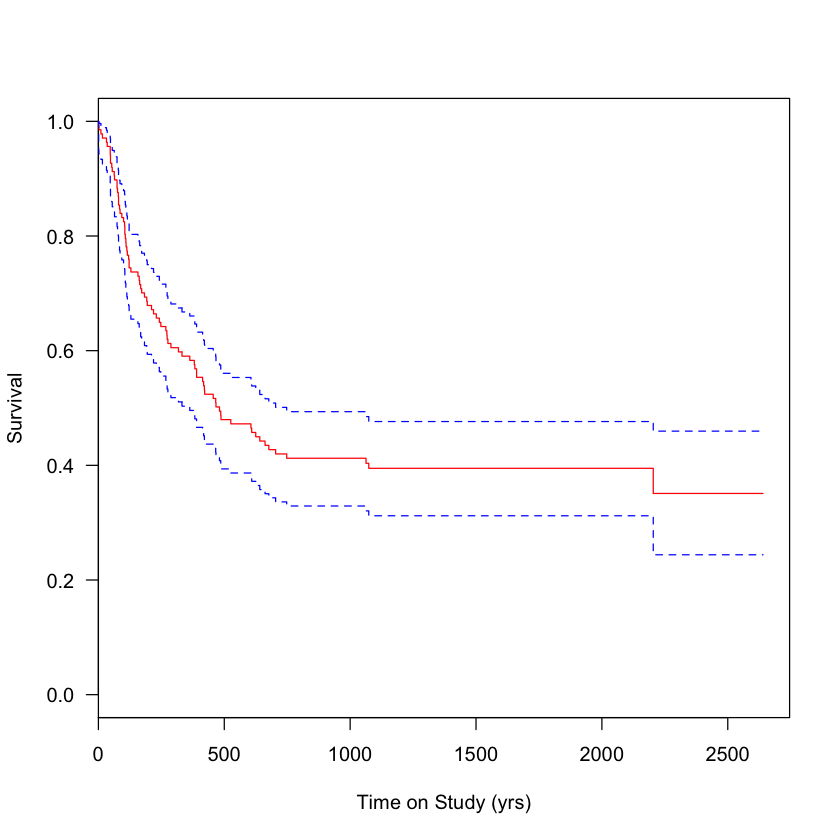

In [23]:
plot(kmEst, xlab = "Time on Study (yrs)", ylab = "Survival", las = 1, col = c("red", "blue", "blue"))

__(d) Obtain estimates and 95% confidence intervals for the 25th percentile and the median disease-free
survival times.__


In [25]:
qKM(kmEst, c(0.75, .50))

perc.surv,km.est,lower,upper
0.75,122,104,194
0.50,481,363,748


__(e) Now examine only those subjects who survive disease-free at least 90 days. Obtain the survival
function for these subjects.__

In [27]:
kmEst_90 = survfit(Surv(tnodis, inodis) ~ 1, data = bmt, conf.type = "log-log", subset = tnodis > 90)
kmEst_90

Call: survfit(formula = Surv(tnodis, inodis) ~ 1, data = bmt, subset = tnodis > 
    90, conf.type = "log-log")

      n  events  median 0.95LCL 0.95UCL 
    115      61     748     481      NA 

__(f) What is the estimated probability of surviving disease-free at least 180 days, conditional upon
survival to 90 days? Provide a confidence interval for this probability. What about survival to
365 days given survival to 90 days?__

In [29]:
pKM(kmEst_90, c(180, 365))

time,km.est,lower,upper
180,0.8347826,0.7533051,0.8912630
365,0.6945894,0.6013448,0.7701729


__(g) Consider the risk set at 93 days. How many subjects are in this set? What is the proportion of
ALL to AML patients in this risk set?__

In [31]:
bmt$all = (bmt$g == 1)

In [32]:
kmEst90.g = survfit( Surv(tnodis, inodis) ~ all, data = bmt, conf.type = "log-log", subset = tnodis >= 90)
summary(kmEst90.g)

Call: survfit(formula = Surv(tnodis, inodis) ~ all, data = bmt, subset = tnodis >= 
    90, conf.type = "log-log")

                all=FALSE 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   93     81       1    0.988  0.0123        0.916        0.998
  100     80       1    0.975  0.0172        0.905        0.994
  105     79       2    0.951  0.0241        0.874        0.981
  113     77       1    0.938  0.0267        0.858        0.974
  115     76       1    0.926  0.0291        0.843        0.966
  120     75       1    0.914  0.0312        0.827        0.958
  157     74       1    0.901  0.0331        0.812        0.949
  162     73       1    0.889  0.0349        0.797        0.941
  164     72       1    0.877  0.0366        0.783        0.932
  168     71       1    0.864  0.0381        0.768        0.922
  183     70       1    0.852  0.0395        0.754        0.913
  211     69       1    0.840  0.0408        0.740        0.903
  219     68       1    0

__This problem involves use of the tongue cancer data (§ 1.11 in Klein & Moeschberger).__

__(a) Separately for both the aneuploid and diploid groups, plot the Kaplan-Meier estimates of the
survival curves on the same graph. Comment on the relative survival experience of the two
groups. Similarly, plot the log cumulative hazard functions for each group.__

In [33]:
tongue_cancer = read.csv("tongue.csv")

In [34]:
head(tongue_cancer)

X,dna,timewks,idied
1,1,1,1
2,1,3,1
3,1,3,1
4,1,4,1
5,1,10,1
6,1,13,1


In [35]:
str(tongue_cancer)

'data.frame':	80 obs. of  4 variables:
 $ X      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dna    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ timewks: int  1 3 3 4 10 13 13 16 16 24 ...
 $ idied  : int  1 1 1 1 1 1 1 1 1 1 ...


In [39]:
kmEst = survfit(Surv(timewks, idied) ~ dna, data = tongue_cancer, conf.type = "log-log")
kmEst

Call: survfit(formula = Surv(timewks, idied) ~ dna, data = tongue_cancer, 
    conf.type = "log-log")

       n events median 0.95LCL 0.95UCL
dna=1 52     31     93      65     157
dna=2 28     22     42      18     104

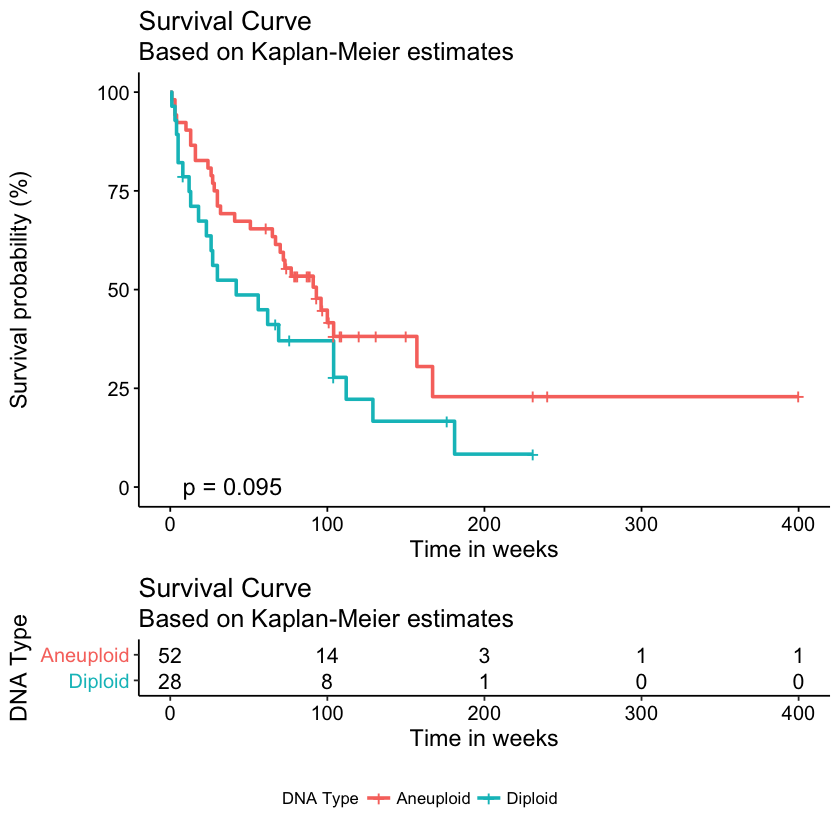

In [63]:
library(survminer)
ggsurvplot(kmEst, data = tongue_cancer, pval = TRUE, fun = "pct", risk.table = TRUE, size = 1, 
           legend = "bottom", legend.title = "DNA Type", legend.labs = c("Aneuploid", "Diploid"),
           xlab = "Time in weeks") + labs(title = "Survival Curve", subtitle = "Based on Kaplan-Meier estimates")

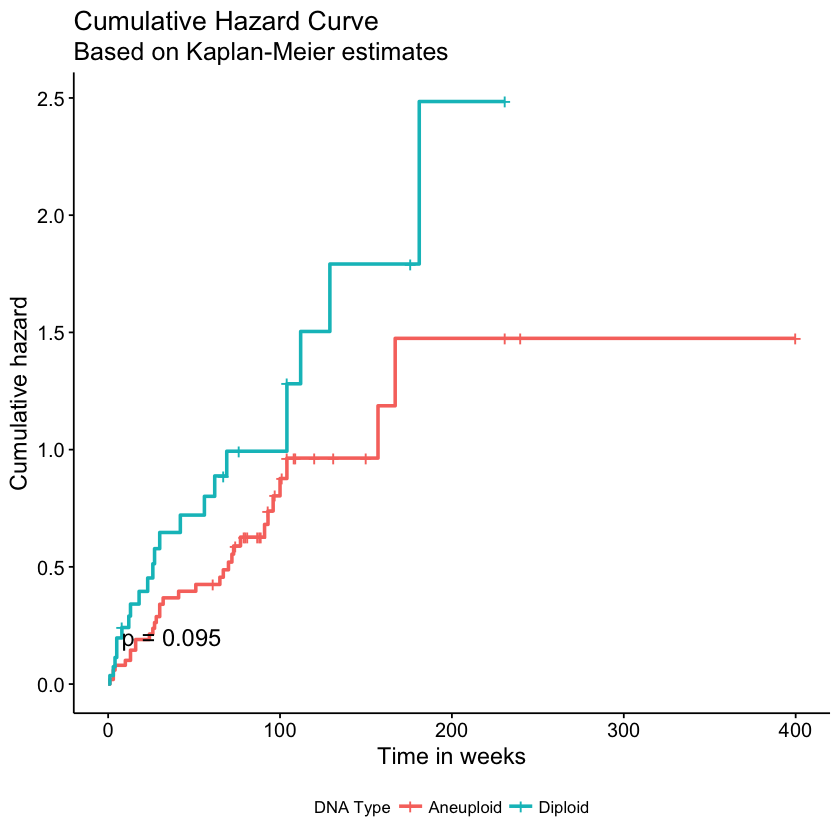

In [66]:
library(survminer)
ggsurvplot(kmEst, data = tongue_cancer, pval = TRUE, fun = "cumhaz", size = 1, 
           legend = "bottom", legend.title = "DNA Type", legend.labs = c("Aneuploid", "Diploid"),
           xlab = "Time in weeks") + 
           labs(title = "Cumulative Hazard Curve", subtitle = "Based on Kaplan-Meier estimates")

__(b) For each group, estimate the median survival time and find a confidence interval for this parameter.__

In [67]:
qKM(kmEst, c(0.50))

perc.surv,km.est,lower,upper
0.5,93,65,157
perc.surv,km.est,lower,upper
0.5,42,18,104


__(c) For each group, estimate the one-year survival rate and find a confidence interval for this parameter.__

In [70]:
pKM(kmEst, c(52))

time,km.est,lower,upper
52,0.6538462,0.5082789,0.7658539
time,km.est,lower,upper
52,0.4863946,0.2912702,0.6563082


__(d) Carry out a test of the hypothesis that the survival distributions differ by DNA group. Clearly
state your alternatives. What do you conclude?__

In [77]:
fit = survdiff(Surv(timewks, idied) ~ dna, data = tongue_cancer)
fit

Call:
survdiff(formula = Surv(timewks, idied) ~ dna, data = tongue_cancer)

       N Observed Expected (O-E)^2/E (O-E)^2/V
dna=1 52       31     36.6     0.843      2.79
dna=2 28       22     16.4     1.873      2.79

 Chisq= 2.8  on 1 degrees of freedom, p= 0.0949 

__3. Data regarding the death times of 863 kidney transplant patients (see § 1.7 in Klein & Moeschberger)
is available on the course webpage. Here, patients can be classified by race and sex into one of four
groups.__

__(a) Test the hypothesis that there is no difference in survival between the four groups. Clearly state
null and alternative hypotheses, provide test statistics and conclusions based on these results.__

In [79]:
kidney = read.csv("kidneytransplant.csv")

In [80]:
head(kidney)

ptid,obstime,death,gender,race,age
1,1,0,1,1,46
2,5,0,1,1,51
3,7,1,1,1,55
4,9,0,1,1,57
5,13,0,1,1,45
6,13,0,1,1,43


In [87]:
survdiff(Surv(obstime, death) ~ gender + race, data = kidney)

Call:
survdiff(formula = Surv(obstime, death) ~ gender + race, data = kidney)

                   N Observed Expected (O-E)^2/E (O-E)^2/V
gender=1, race=1 432       73    69.25    0.2025    0.4013
gender=1, race=2  92       14    14.52    0.0184    0.0205
gender=2, race=1 280       39    47.39    1.4860    2.2531
gender=2, race=2  59       14     8.84    3.0173    3.2245

 Chisq= 4.7  on 3 degrees of freedom, p= 0.192 

__(b) Adjusting for the sex of the patient, test the hypothesis that blacks have a higher mortality rate
than whites. Also, provide individual tests for each sex of the hypothesis of no racial differences
in survival rates.__

In [89]:
survdiff(Surv(obstime, death) ~ race + strata(gender), data = kidney)

Call:
survdiff(formula = Surv(obstime, death) ~ race + strata(gender), 
    data = kidney)

         N Observed Expected (O-E)^2/E (O-E)^2/V
race=1 712      112    116.7     0.188      1.13
race=2 151       28     23.3     0.942      1.13

 Chisq= 1.1  on 1 degrees of freedom, p= 0.287 

In [99]:
age = seq(14,26)
Started_Smoking = c(2,3,10,13,5,3,2,1,2,1,0,0,1)
No_age = c(0,0,0,0,0,0,4,6,8,2,0,0,0)
Not_smoke = c(0,0,0,0,0,1,13,44,39,19,3,4,4)


In [100]:
table = data.frame(age, Started_Smoking, No_age, Not_smoke)

In [101]:
table

age,Started_Smoking,No_age,Not_smoke
14,2,0,0
15,3,0,0
16,10,0,0
17,13,0,0
18,5,0,0
19,3,0,1
20,2,4,13
21,1,6,44
22,2,8,39
23,1,2,19


In [116]:
kmEst = survfit(Surv(age) ~ 1, data = table, conf.type = "log")
summary(kmEst)

Call: survfit(formula = Surv(age) ~ 1, data = table, conf.type = "log")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   14     13       1   0.9231  0.0739       0.7890        1.000
   15     12       1   0.8462  0.1001       0.6711        1.000
   16     11       1   0.7692  0.1169       0.5711        1.000
   17     10       1   0.6923  0.1280       0.4819        0.995
   18      9       1   0.6154  0.1349       0.4004        0.946
   19      8       1   0.5385  0.1383       0.3255        0.891
   20      7       1   0.4615  0.1383       0.2566        0.830
   21      6       1   0.3846  0.1349       0.1934        0.765
   22      5       1   0.3077  0.1280       0.1361        0.695
   23      4       1   0.2308  0.1169       0.0855        0.623
   24      3       1   0.1538  0.1001       0.0430        0.550
   25      2       1   0.0769  0.0739       0.0117        0.506
   26      1       1   0.0000     NaN           NA           NA